In [15]:
from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import  matplotlib.pyplot as plt
import seaborn as sns 

In [16]:
X,y = make_classification(n_samples=1000 , n_classes = 2 , random_state=1)

In [17]:
X.shape

(1000, 20)

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.30 , random_state=42)

In [19]:
#generate a no skill prediction dummy model with 0 as default prediction 
dummy_model_prob = [ 0 for _ in range (len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [20]:
#basic model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [21]:
model_prob = model.predict_proba(X_test)

In [22]:
model_prob = model_prob[:,1]

In [23]:
#calculate the scores

dummy_model_auc = roc_auc_score(y_test , dummy_model_prob)
model_auc = roc_auc_score(y_test ,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9044392939917989


In [29]:
#calculate ROC curve
dummy_fpr , dummy_tpr , _ = roc_curve(y_test , dummy_model_prob)
real_fpr , real_tpr, thresholds = roc_curve(y_test , model_prob)

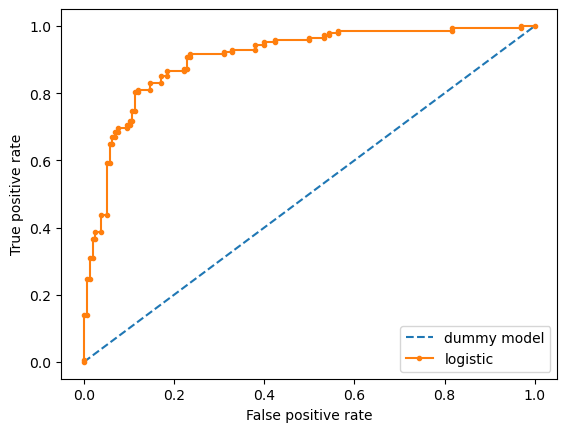

In [28]:
#plot the roc curve 

plt.plot(dummy_fpr , dummy_tpr , linestyle='--',label='dummy model')
plt.plot(real_fpr , real_tpr , marker='.' , label='logistic')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()



In [30]:
thresholds

array([           inf, 9.99841431e-01, 9.90312178e-01, 9.89789604e-01,
       9.69840515e-01, 9.67711850e-01, 9.54350198e-01, 9.49376937e-01,
       9.37595993e-01, 9.36574071e-01, 9.30988369e-01, 9.26229039e-01,
       9.09517229e-01, 9.07343469e-01, 8.43163099e-01, 8.42880786e-01,
       8.23496913e-01, 8.19906654e-01, 8.05679913e-01, 8.03023949e-01,
       7.88766865e-01, 7.83267314e-01, 7.79808524e-01, 7.73542569e-01,
       7.73042351e-01, 7.66533994e-01, 7.59977292e-01, 7.55728997e-01,
       7.38345078e-01, 7.33647339e-01, 6.87282357e-01, 6.53656208e-01,
       6.50234894e-01, 6.25724165e-01, 6.10931389e-01, 5.68941486e-01,
       5.22332907e-01, 5.07118055e-01, 4.88670078e-01, 4.61009759e-01,
       4.59292509e-01, 4.56246075e-01, 4.31124193e-01, 4.28500867e-01,
       4.10339171e-01, 3.16619731e-01, 3.09453767e-01, 3.01031985e-01,
       2.78367698e-01, 1.82394320e-01, 1.77011298e-01, 1.66057291e-01,
       1.49173917e-01, 1.31183339e-01, 1.28392734e-01, 9.46586259e-02,
      